<a href="https://colab.research.google.com/github/jotacaba/UBA-2024-03-prog/blob/main/U0T1/11_13_TF1_Py_CABA.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## `PUNTO 1`

In [ ]:
#se carga API de Kaggle
!pip install -q kaggle

In [ ]:
#se carga el token
!mkdir ~/.kaggle
!cp /content/kaggle.json ~/.kaggle/
!chmod 600 ~/.kaggle/kaggle.json

cp: cannot stat '/content/kaggle.json': No such file or directory
chmod: cannot access '/root/.kaggle/kaggle.json': No such file or directory


In [ ]:
#verifico detalle de competencias
#!kaggle competitions list

Traceback (most recent call last):
  File "/usr/local/bin/kaggle", line 5, in <module>
    from kaggle.cli import main
  File "/usr/local/lib/python3.10/dist-packages/kaggle/__init__.py", line 7, in <module>
    api.authenticate()
  File "/usr/local/lib/python3.10/dist-packages/kaggle/api/kaggle_api_extended.py", line 407, in authenticate
    raise IOError('Could not find {}. Make sure it\'s located in'
OSError: Could not find kaggle.json. Make sure it's located in /root/.kaggle. Or use the environment method. See setup instructions at https://github.com/Kaggle/kaggle-api/


In [ ]:
#from google.colab import drive
#drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
!kaggle datasets download -d cnic92/200-financial-indicators-of-us-stocks-20142018

Dataset URL: https://www.kaggle.com/datasets/cnic92/200-financial-indicators-of-us-stocks-20142018
License(s): copyright-authors
 34% 5.00M/14.8M [00:00<00:00, 49.1MB/s]
100% 14.8M/14.8M [00:00<00:00, 107MB/s] 


In [ ]:
#se descomprime el archivo .zip
!unzip /content/200-financial-indicators-of-us-stocks-20142018.zip

Archive:  /content/200-financial-indicators-of-us-stocks-20142018.zip
  inflating: 2014_Financial_Data.csv  
  inflating: 2015_Financial_Data.csv  
  inflating: 2016_Financial_Data.csv  
  inflating: 2017_Financial_Data.csv  
  inflating: 2018_Financial_Data.csv  


In [ ]:
#1)a) Se utiliza únicamente el DataFrame 2017_Financial_Data.csv
import pandas as pd
findata2017=pd.read_csv('/content/2017_Financial_Data.csv')
findata2017.head(5)

,Unnamed: 0,Revenue,Revenue Growth,Cost of Revenue,Gross Profit,R&D Expenses,SG&A Expense,Operating Expenses,Operating Income,Interest Expense,...,Receivables growth,Inventory Growth,Asset Growth,Book Value per Share Growth,Debt Growth,R&D Expense Growth,SG&A Expenses Growth,Sector,2018 PRICE VAR [%],Class
0,PG,6.505800e+10,-0.0037,3.263800e+10,3.242000e+10,0.000000e+00,1.865400e+10,1.865400e+10,1.376600e+10,4.650000e+08,...,0.0505,-0.0195,-0.0529,0.0012,0.0325,0.0000,-0.0156,Consumer Defensive,4.975151,1
1,VIPS,1.102060e+10,0.3525,8.557810e+09,2.462794e+09,2.733452e+08,8.201852e+08,2.056136e+09,4.066575e+08,1.245995e+07,...,0.9219,0.4764,0.5889,1.5821,0.3805,0.2141,0.1920,Consumer Defensive,-56.320000,0
2,KR,1.153370e+11,0.0501,8.950200e+10,2.583500e+10,0.000000e+00,1.916200e+10,2.238300e+10,3.452000e+09,5.220000e+08,...,-0.0490,0.0637,0.0769,0.0071,0.1654,0.0000,0.0678,Consumer Defensive,-0.990449,0
3,RAD,2.292754e+10,0.1039,1.786283e+10,5.064707e+09,0.000000e+00,4.776995e+09,4.816124e+09,2.485830e+08,2.000650e+08,...,0.1063,-0.3365,0.0281,0.0502,-0.5295,0.0000,0.0427,Consumer Defensive,-66.666666,0
4,GIS,1.561980e+10,-0.0570,1.005200e+10,5.567800e+09,0.000000e+00,2.888800e+09,3.069200e+09,2.498600e+09,2.951000e+08,...,0.0509,0.0494,0.0046,-0.0943,0.1246,0.0000,-0.0738,Consumer Defensive,-31.280412,0


In [ ]:
#1)b) se verifican las dimensiones del DataFrame
findata2017.shape

(4960, 225)

In [ ]:
#1)c) se consulta el nombre de la 1er columna antes de renombrarla
findata2017.columns[0]

'Unnamed: 0'

In [ ]:
# se renombra la 1er columna sin modificar el nombre del DataFrame y se verifica el cambio
findata2017=findata2017.rename({"Unnamed: 0":"EMPRESA"}, axis=1)
findata2017.columns[0]

'EMPRESA'

PUNTO 2

In [ ]:
#2) se busca la cantidad de variables por tipo
findata2017.dtypes.value_counts()

,count
float64,222
object,2
int64,1


In [ ]:
# se consulta cuáles son las dos variables tipo object: EMPRESA y Sector
findata2017.select_dtypes(include=['object']).head(0)

,EMPRESA,Sector


In [ ]:
# se verifica el tipo de datos de cada variable
#pd.set_option("display.max_rows", 999)
#findata2017.dtypes

In [ ]:
# 2)e) se recategorizan las variables object a categorías numéricas
# EMPRESA, Sector
findata2017['EMPRESA']=findata2017['EMPRESA'].astype('category').cat.codes
findata2017['Sector']=findata2017['Sector'].astype('category').cat.codes

In [ ]:
#otra forma...
#findata2017['EMPRESA']=dfindata2017['EMPRESA'].astype('int64')


In [ ]:
# se verifica el cambio de categoría
print(findata2017['EMPRESA'].dtypes, findata2017['Sector'].dtypes)

int16 int8


In [ ]:
# una vez realizadas las transformaciones se vuelve a consultar la cantidad de variables por tipo, resultando todas numéricas
findata2017.dtypes.value_counts()

,count
float64,222
int16,1
int8,1
int64,1


In [ ]:
# casos por variable recategorizada
print("Casos de variable EMPRESA:")
print(findata2017['EMPRESA'].count())
print()
print("Casos de variable Sector:")
print(findata2017['Sector'].count())

Casos de variable EMPRESA:
4960

Casos de variable Sector:
4960


In [ ]:
# 2)f) se consulta la existencia de valores faltantes
# df.isna().sum()/df.shape[0]*100  para calcular % de faltantes por rubro
findata2017.isna().sum()

,0
EMPRESA,0
Revenue,525
Revenue Growth,724
Cost of Revenue,679
Gross Profit,534
...,...
R&D Expense Growth,850
SG&A Expenses Growth,828
Sector,0
2018 PRICE VAR [%],0


In [ ]:
# total de variables faltantes del detaframe original
findata2017.isnull().sum().sum()

226269

In [ ]:
# cantidad de variables con valores faltantes del dataframe original
findata2017.isnull().any(axis=0).sum()

221

In [ ]:
# se construye dataframe con la salida de datos faltantes por variable
faltantes = pd.DataFrame(findata2017.isna().sum()).reset_index()
faltantes

,index,0
0,EMPRESA,0
1,Revenue,525
2,Revenue Growth,724
3,Cost of Revenue,679
4,Gross Profit,534
...,...,...
220,R&D Expense Growth,850
221,SG&A Expenses Growth,828
222,Sector,0
223,2018 PRICE VAR [%],0


In [ ]:
# se consulta el nombre de las columnas: index y 0
faltantes.columns

Index(['index', 0], dtype='object')

In [ ]:
# se cambia el nombre de las columnas
faltantes.columns = ['VARIABLES', 'CASOS']
faltantes.columns

Index(['VARIABLES', 'CASOS'], dtype='object')

In [ ]:
# se consulta cantidad de filas y columnas
faltantes.shape

(225, 2)

In [ ]:
# consulta
faltantes.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 225 entries, 0 to 224
Data columns (total 2 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   VARIABLES  225 non-null    object
 1   CASOS      225 non-null    int64 
dtypes: int64(1), object(1)
memory usage: 3.6+ KB


In [ ]:
# filas con CASOS igual a cero, es decir, no poseen valores faltantes
faltantes[faltantes['CASOS']==0]

,VARIABLES,CASOS
0,EMPRESA,0
222,Sector,0
223,2018 PRICE VAR [%],0
224,Class,0


In [ ]:
# cantidad de VARIABLES sin datos faltantes: 4
faltantes[faltantes['CASOS']==0].count()

,0
VARIABLES,4
CASOS,4


In [ ]:
#VARIABLES con datos faltantes
faltantes[faltantes['CASOS']!=0]

,VARIABLES,CASOS
1,Revenue,525
2,Revenue Growth,724
3,Cost of Revenue,679
4,Gross Profit,534
5,R&D Expenses,787
...,...,...
217,Asset Growth,792
218,Book Value per Share Growth,893
219,Debt Growth,854
220,R&D Expense Growth,850


In [ ]:
#cantidad de VARIABLES con datos faltantes: 221
faltantes[faltantes['CASOS']!=0].count()

,0
VARIABLES,221
CASOS,221


PUNTO 3

In [ ]:
# nuevo DataFrame
data2017=pd.DataFrame(findata2017, columns=["EMPRESA","Revenue","Gross Profit","EBITDA","EBIT","ROE","Sector","Class"])
data2017.reset_index()
data2017

,EMPRESA,Revenue,Gross Profit,EBITDA,EBIT,ROE,Sector,Class
0,3534,6.505800e+10,3.242000e+10,2.167400e+10,1.885400e+10,0.2748,3,1
1,4676,1.102060e+10,2.462794e+09,5.622560e+08,4.017881e+08,0.1364,3,0
2,2557,1.153370e+11,2.583500e+10,5.794000e+09,3.454000e+09,0.2949,3,0
3,3740,2.292754e+10,5.064707e+09,6.559220e+08,2.485560e+08,0.0066,3,0
4,1909,1.561980e+10,5.567800e+09,3.211400e+09,2.607800e+09,0.3830,3,0
...,...,...,...,...,...,...,...,...
4955,4497,6.257258e+07,1.024606e+07,5.511650e+05,5.311890e+05,0.0347,9,0
4956,4541,1.065240e+08,9.361500e+07,8.731000e+06,6.656000e+06,0.2699,9,1
4957,4610,1.040000e+08,2.700000e+07,5.000000e+06,-1.000000e+06,NaN,9,0
4958,4853,1.605670e+08,2.707600e+07,8.331000e+06,7.854000e+06,0.1308,9,0


In [ ]:
Punto 3) h)

In [ ]:
#3)h) se renombra columna
data2017=data2017.rename({"Gross Profit":"Gross_Profit"}, axis=1)
# se verifica
data2017.head(0)

,EMPRESA,Revenue,Gross_Profit,EBITDA,EBIT,ROE,Sector,Class


In [ ]:
data2017.shape

(4960, 8)

In [ ]:
data2017.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4960 entries, 0 to 4959
Data columns (total 8 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   EMPRESA       4960 non-null   int16  
 1   Revenue       4435 non-null   float64
 2   Gross_Profit  4426 non-null   float64
 3   EBITDA        4294 non-null   float64
 4   EBIT          4368 non-null   float64
 5   ROE           4119 non-null   float64
 6   Sector        4960 non-null   int8   
 7   Class         4960 non-null   int64  
dtypes: float64(5), int16(1), int64(1), int8(1)
memory usage: 247.2 KB


In [ ]:
Punto 3) i)

ACLARACIÓN DEL SITIO. https://www.kaggle.com/datasets/cnic92/200-financial-indicators-of-us-stocks-20142018
The last column, class, lists a binary classification for each stock, where for each stock, if the PRICE VAR [%] value is positive, class = 1. From a trading perspective, the 1 identifies those stocks that an hypothetical trader should BUY at the start of the year and sell at the end of the year for a profit. or each stock, if the PRICE VAR [%] value is negative, class = 0. From a trading perspective, the 0 identifies those stocks that an hypothetical trader should NOT BUY, since their value will decrease, meaning a loss of capital.

In [ ]:
# el dataframe planteado está integrado por aquellas variables vinculadas con el resultado de la empresa relevada en el año 2017.

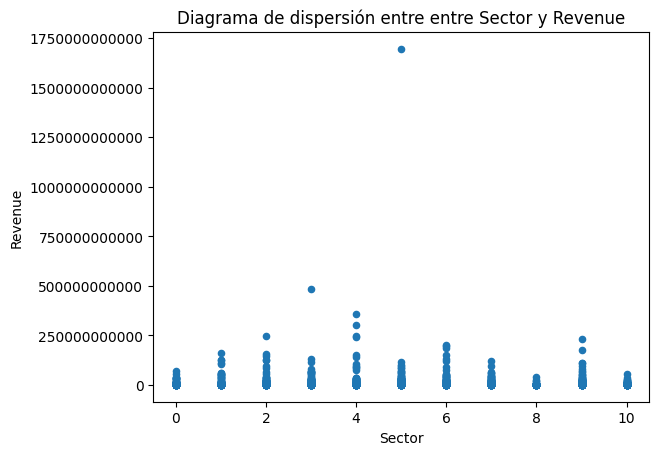

In [ ]:
#Diagrama de dispersión entre Sector y Revenue
import numpy as np
import matplotlib.pyplot as plt

data2017.plot(kind='scatter', x='Sector', y='Revenue')
plt.ticklabel_format(style='plain')

x = data2017['Sector']
y = data2017['Revenue']
m, b = np.polyfit(x, y, 1)

plt.plot(x, m*x + b, color='red')
plt.xlabel('Sector')
plt.ylabel('Revenue')
plt.title('Diagrama de dispersión entre entre Sector y Revenue')
plt.show()

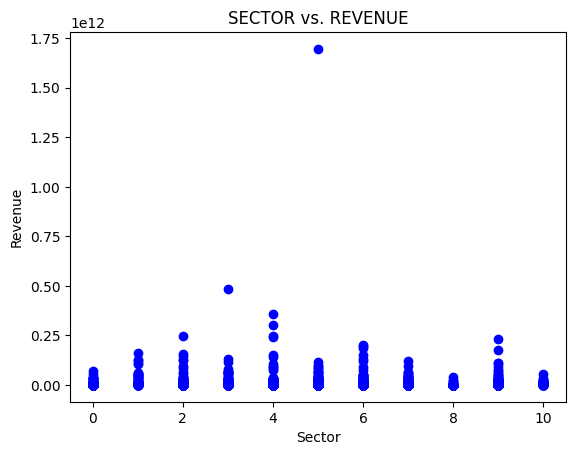

In [ ]:
#Scatterplot
import matplotlib.pyplot as plt
plt.scatter(data2017['Sector'], data2017['Revenue'], c ="blue")
plt.title("SECTOR vs. REVENUE")
plt.xlabel("Sector")
plt.ylabel("Revenue")
plt.show()

Punto 3) j)

In [ ]:
#3)j) Profiling Report
import sys
!{sys.executable} -m pip install -U pandas-profiling[notebook]
!jupyter nbextension enable --py widgetsnbextension


In [ ]:
!pip install https://github.com/pandas-profiling/pandas-profiling/archive/master.zip

In [ ]:
#luego de instalar
!pip install MarkupSafe==2.1.1

In [ ]:
#actualizar versión
!pip install xlrd==1.2.0

In [ ]:
#se ejecuta el reporte
from pandas_profiling import ProfileReport
ProfileReport(data2017)

PUNTO 4

Punto 4) k)

In [ ]:
#4)k) valores faltantes
data2017.isna().sum()

,0
EMPRESA,0
Revenue,525
Gross_Profit,534
EBITDA,666
EBIT,592
ROE,841
Sector,0
Class,0


In [ ]:
import numpy as np
#import sklearn
#from sklearn.impute import SimpleImputer

Punto 4) l)

In [ ]:
#4)l)
# inicialmente este punto se planteó creando un nuevo dataframe idéntico al que se venía trabajando, luego se le agregaron las columnas MARCA_XX para luego hacer los reemplazos por 1 y 0,
#data2017_xx = pd.DataFrame(data2017)

# se agregan las columnas MARCA_XX
#data2017_xx['MARCA_RV'] = data2017_xx['Revenue']
#data2017_xx['MARCA_GP'] = data2017_xx['Gross_Profit']
#data2017_xx['MARCA_DA'] = data2017_xx['EBITDA']
#data2017_xx['MARCA_IT'] = data2017_xx['EBIT']
#data2017_xx['MARCA_RO'] = data2017_xx['ROE']
#data2017_xx

# sin embargo, no se encontró el procedimiento adecuando para resolver el planteo. Por ello, se creó el dataframe "data2017_xx" luego se cambiaron los nombres de las columnas, se hicieron las transformaciones y, por último se verificaron con el dataframe original


In [ ]:
# se crea un dataframe con las columnas que deben agregarse para hacer los reemplazos en los datos NaN y demás
data2017_xx = pd.DataFrame(findata2017, columns=["Revenue","Gross Profit","EBITDA","EBIT","ROE"])
data2017_xx.reset_index()
data2017_xx

,Revenue,Gross Profit,EBITDA,EBIT,ROE
0,6.505800e+10,3.242000e+10,2.167400e+10,1.885400e+10,0.2748
1,1.102060e+10,2.462794e+09,5.622560e+08,4.017881e+08,0.1364
2,1.153370e+11,2.583500e+10,5.794000e+09,3.454000e+09,0.2949
3,2.292754e+10,5.064707e+09,6.559220e+08,2.485560e+08,0.0066
4,1.561980e+10,5.567800e+09,3.211400e+09,2.607800e+09,0.3830
...,...,...,...,...,...
4955,6.257258e+07,1.024606e+07,5.511650e+05,5.311890e+05,0.0347
4956,1.065240e+08,9.361500e+07,8.731000e+06,6.656000e+06,0.2699
4957,1.040000e+08,2.700000e+07,5.000000e+06,-1.000000e+06,NaN
4958,1.605670e+08,2.707600e+07,8.331000e+06,7.854000e+06,0.1308


In [ ]:
# se cambian los nombre de las columnas para utilizar los solicitados
data2017_xx = data2017_xx.set_axis(['MARCA_RV', 'MARCA_GP', 'MARCA_DA', 'MARCA_IT', 'MARCA_RO'],axis=1)
data2017_xx

,MARCA_RV,MARCA_GP,MARCA_DA,MARCA_IT,MARCA_RO
0,6.505800e+10,3.242000e+10,2.167400e+10,1.885400e+10,0.2748
1,1.102060e+10,2.462794e+09,5.622560e+08,4.017881e+08,0.1364
2,1.153370e+11,2.583500e+10,5.794000e+09,3.454000e+09,0.2949
3,2.292754e+10,5.064707e+09,6.559220e+08,2.485560e+08,0.0066
4,1.561980e+10,5.567800e+09,3.211400e+09,2.607800e+09,0.3830
...,...,...,...,...,...
4955,6.257258e+07,1.024606e+07,5.511650e+05,5.311890e+05,0.0347
4956,1.065240e+08,9.361500e+07,8.731000e+06,6.656000e+06,0.2699
4957,1.040000e+08,2.700000e+07,5.000000e+06,-1.000000e+06,NaN
4958,1.605670e+08,2.707600e+07,8.331000e+06,7.854000e+06,0.1308


In [ ]:
# se consulta la existencia de valores faltantes
data2017_xx.isna().sum()

,0
MARCA_RV,525
MARCA_GP,534
MARCA_DA,666
MARCA_IT,592
MARCA_RO,841


In [ ]:
# se reemplazan los valores faltantes por 1 y el resto por 0
data2017_xx = data2017_xx[['MARCA_RV', 'MARCA_GP', 'MARCA_DA', 'MARCA_IT', 'MARCA_RO' ]].notna().astype(int).replace({1: 0, 0: 1})

In [ ]:
# se verifica el éxito del reemplazo consultando la existencia de valores faltantes
data2017_xx.isna().sum()

,0
MARCA_RV,0
MARCA_GP,0
MARCA_DA,0
MARCA_IT,0
MARCA_RO,0


In [ ]:
# se plantea la verificación sumando los datos de cada columna
verif = data2017_xx['MARCA_RV'].sum(), data2017_xxxx['MARCA_GP'].sum(),data2017_xxxx['MARCA_DA'].sum(), data2017_xxxx['MARCA_IT'].sum(),data2017_xxxx['MARCA_RO'].sum()
verif

(525, 534, 666, 592, 841)

In [ ]:
# se comparan ambos resultados resultando exitoso el procedimiento
print(data2017.isna().sum())
print(verif)

EMPRESA           0
Revenue         525
Gross_Profit    534
EBITDA          666
EBIT            592
ROE             841
Sector            0
Class             0
dtype: int64
(525, 534, 666, 592, 841)


Punto 4

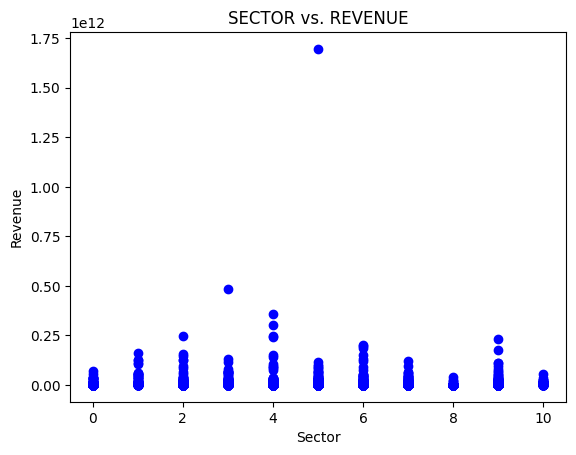

In [ ]:
#Scatterplot
import matplotlib.pyplot as plt
plt.scatter(data2017['Sector'], data2017['MARCA_RV'], c ="blue")
plt.title("SECTOR vs. REVENUE")
plt.xlabel("Sector")
plt.ylabel("Revenue")
plt.show()